In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("housing.csv")
print(" Data Loaded Successfully!")
print("\n First 5 Rows of the Dataset:")
display(df.head())


 Data Loaded Successfully!

 First 5 Rows of the Dataset:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print("\n Dataset Information:")
print(df.info())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null 

In [4]:
print("\n Summary Statistics:")
display(df.describe())



 Summary Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


In [5]:
print("\n Missing Values in Each Column:")
print(df.isnull().sum())


 Missing Values in Each Column:
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64


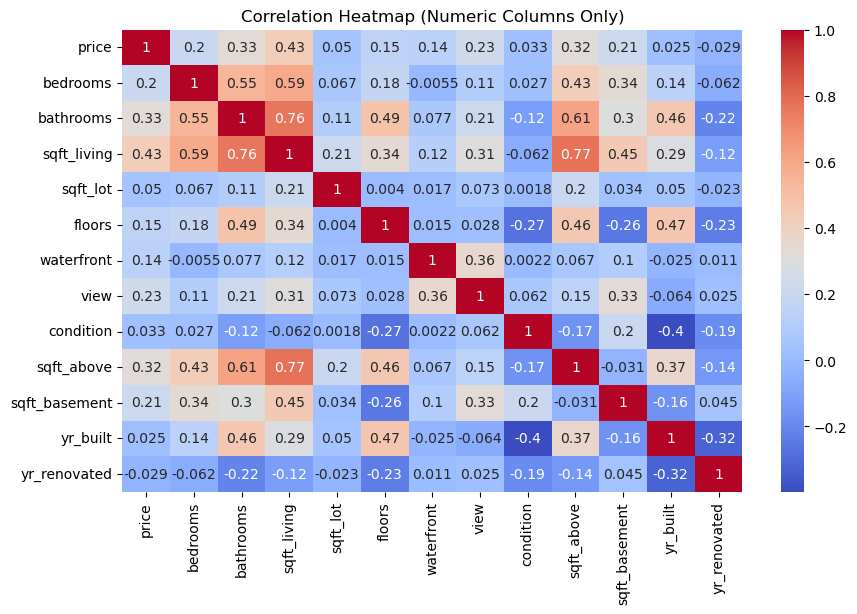

In [6]:
df = df.dropna()
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()



In [7]:
if 'median_income' in df.columns and 'median_house_value' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='median_income', y='median_house_value', data=df)
    plt.title("Income vs House Value")
    plt.show()


In [12]:
if 'median_house_value' in df.columns:
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
else:
    print("Please check your target column name.")

Please check your target column name.


In [16]:
# Example: if your target column is 'price'
y = df['price']
X = df.drop('price', axis=1)

# Convert non-numeric columns to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("\n Model Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


 Model Evaluation:
MAE: 278819.13
MSE: 149418943424.82
RMSE: 386547.47
R² Score: 0.05


In [21]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results.head(10))

,Actual,Predicted
1963,725000.0,6.145952e+05
611,1680000.0,1.093509e+06
224,979000.0,1.247863e+06
341,515000.0,5.021969e+05
605,375000.0,1.056887e+04
246,675000.0,4.817982e+05
4281,360000.0,3.358322e+05
3514,240000.0,3.519362e+05
2343,535000.0,9.102882e+05
1885,519000.0,5.598166e+05


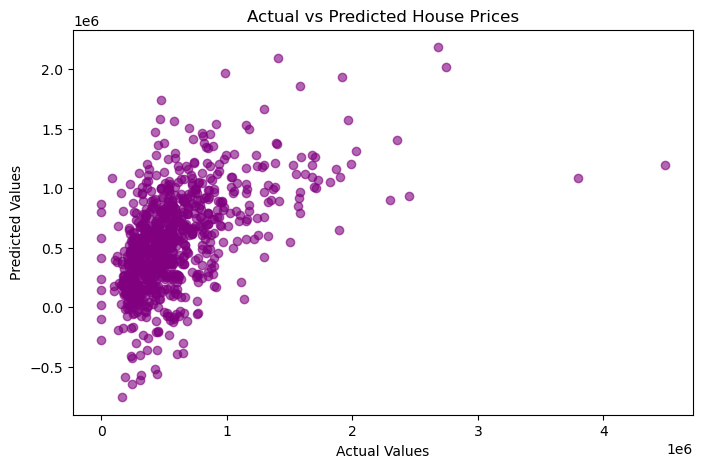

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()